In [131]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import linear_model
import missingno as msno

In [2]:
data= pd.read_csv("C:/Users/PQ/Desktop/data.csv")

In [3]:
data.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [4]:
data.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [5]:
data.tail()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1
344,98,99,57,45,65,20.0,1


In [6]:
data.skew() , data.kurt()

(mcv        -0.388433
 alkphos     0.753667
 sgpt        3.063499
 sgot        2.293072
 gammagt     2.866094
 drinks      1.543819
 selector   -0.324383
 dtype: float64,
 mcv          2.584958
 alkphos      0.747883
 sgpt        13.813912
 sgot         8.140165
 gammagt     10.476749
 drinks       3.663388
 selector    -1.905858
 dtype: float64)

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

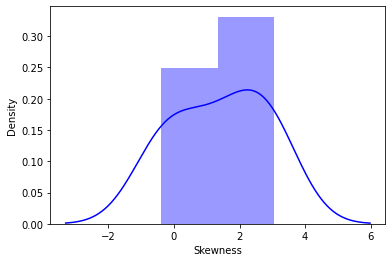

In [7]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


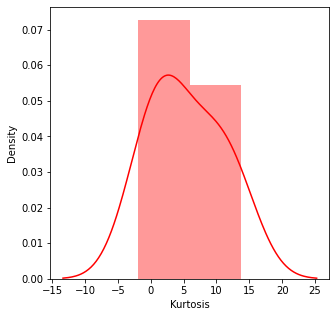

In [8]:
plt.figure(figsize = (5,5))
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

In [8]:
data.shape

(345, 7)

In [10]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'], dtype='object')

In [10]:
categorical_features = data.select_dtypes(include=[np.object])

categorical_features.columns

C:\Users\PQ\AppData\Local\Temp\ipykernel_23196\995836164.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object])


Index([], dtype='object')

<AxesSubplot:>

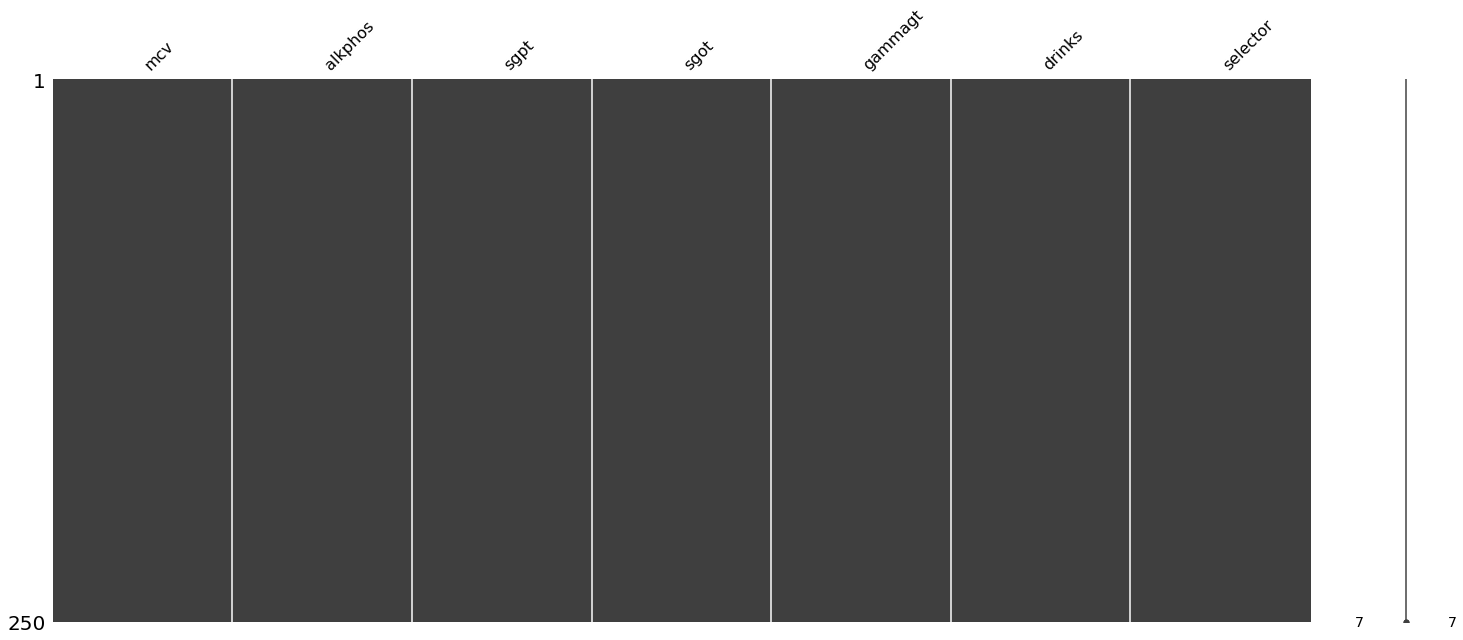

In [13]:
msno.matrix(data.sample(250))

In [11]:
correlation = numeric_features.corr()
print(correlation['drinks'].sort_values(ascending = False),'\n')

drinks      1.000000
gammagt     0.341224
mcv         0.312680
sgot        0.279588
sgpt        0.206848
alkphos     0.100796
selector   -0.022049
Name: drinks, dtype: float64 



<AxesSubplot:>

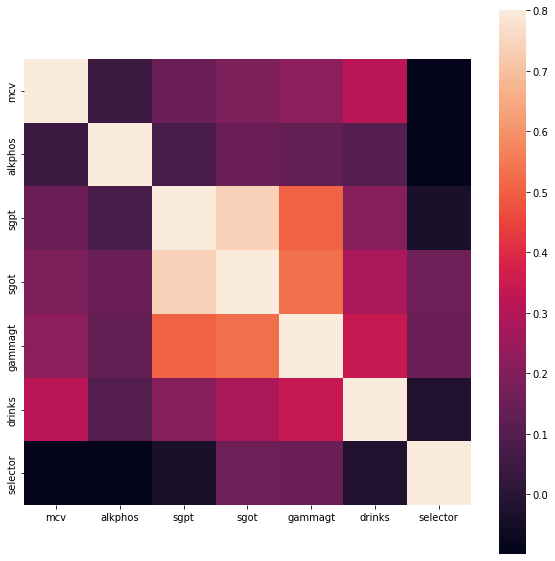

In [12]:
f , ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['selector', 'sgot', 'gammagt', 'drinks', 'sgpt', 'mcv', 'alkphos'], dtype='object')


<AxesSubplot:>

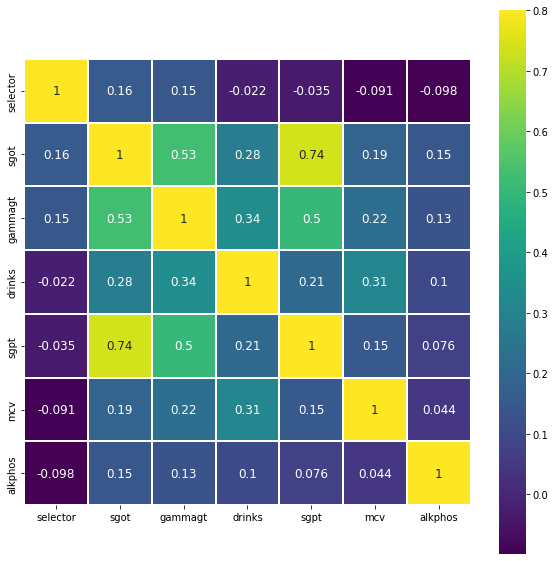

In [18]:
k= 11
cols = correlation.nlargest(k,'selector')['drinks'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (10,10))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


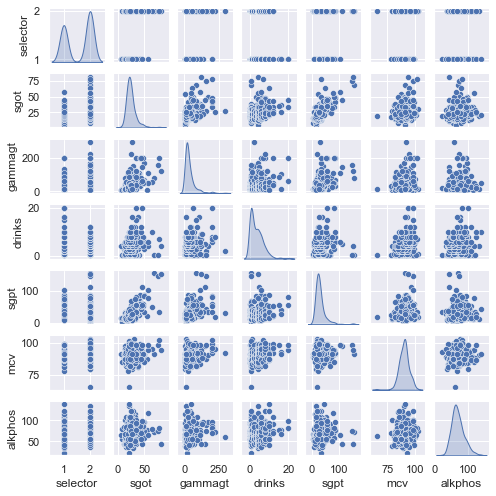

In [26]:
sns.set()
columns = ['selector','sgot','gammagt','drinks','sgpt','mcv','alkphos',]
sns.pairplot(data[columns],size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='alkphos', ylabel='drinks'>

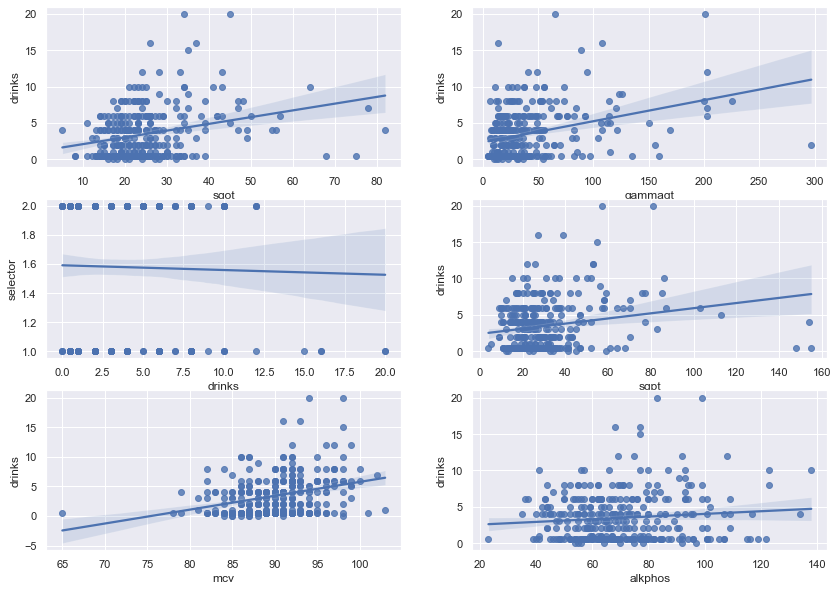

In [14]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([data['drinks'],data['sgot']],axis = 1)
sns.regplot(x='sgot',y = 'drinks',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([data['drinks'],data['gammagt']],axis = 1)
sns.regplot(x='gammagt',y = 'drinks',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([data['selector'],data['drinks']],axis = 1)
sns.regplot(x='drinks',y = 'selector',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([data['drinks'],data['sgpt']],axis = 1)
sns.regplot(x='sgpt',y = 'drinks',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([data['drinks'],data['mcv']],axis = 1)
sns.regplot(x='mcv',y = 'drinks',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([data['drinks'],data['alkphos']],axis = 1)
sns.regplot(x='alkphos',y = 'drinks',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)


In [36]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
mcv,0,0.0
alkphos,0,0.0
sgpt,0,0.0
sgot,0,0.0
gammagt,0,0.0
drinks,0,0.0
selector,0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drinks    345 non-null    float64
 6   selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [54]:
cdf = data[['sgot','alkphos','drinks','gammagt']]
cdf.head()

,sgot,alkphos,drinks,gammagt
0,27,92,0.0,31
1,32,64,0.0,23
2,16,54,0.0,54
3,24,78,0.0,36
4,28,70,0.0,10


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
shape=data.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 345 rows and 7 columns


In [186]:
x=data.iloc[:,:5]
y=data.iloc[:,5]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [188]:
X_train.shape , y_train.shape

((276, 3), (276,))

In [125]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (276, 3)
X_test: (69, 3)
Y_train: (276,)
Y_test: (69,)


In [126]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train);

In [189]:
y_pred=linreg.predict(X_test)

In [190]:
lin_reg.score(X_train,y_train)

0.15796810368726621

In [182]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(data[['sgot','alkphos','mcv','gammagt']])
y = np.asanyarray(data[['drinks']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[0.03642415 0.00806638 0.18033191 0.01904225]]


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [184]:
lin_reg.score(X_train,y_train)

0.15796810368726621

In [1]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

NameError: name 'sns' is not defined